In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Property Assessment 2018 Data

## Changing data type
- To change the datatype of the nb_id column
- Tutorial [Changing data type of pandas series](https://www.ritchieng.com/pandas-changing-datatype/)

In [21]:
col_names = ['acc_num', 'suite', 'number', 'street', 'value', 'class', 
             'nb_id', 'nb', 'ward', 'garage', 'lat', 'long']
col_dtypes = {'acc_num':np.int32, 'suite':object, 'number':object, 'street':object, 
              'value':np.int32, 'class':'category', 'nb':'category'}
col_keep = ['acc_num', 'nb', 'class', 'value', 'suite', 'number', 'street',
             'garage', 'lat', 'long']

df = pd.read_csv('Property_Assessment_Data__Current_Calendar_Year_.csv', 
                 header=0, names=col_names, dtype=col_dtypes, 
                 true_values='Y', false_values='N')[col_keep]

print(df.head(3))
print(df.tail(3))

   acc_num           nb        class   value suite number          street  \
0  1315092       OLIVER  Residential  259000  1005  10011   123 STREET NW   
1  9201484   KENILWORTH  Residential  312500   NaN   8503    52 STREET NW   
2  4225520  TWIN BROOKS  Residential  441000   NaN    811  113B STREET NW   

   garage        lat        long  
0   False  53.540949 -113.533619  
1    True  53.519952 -113.419429  
2    True  53.437892 -113.525607  
         acc_num                         nb              class    value suite  \
393929  10619311  THE ORCHARDS AT ELLERSLIE        Residential   560000   NaN   
393930  10831516            DESROCHERS AREA        Residential   401000   NaN   
393931  10005216          CALLINGWOOD SOUTH  Other Residential  9095000   NaN   

       number              street  garage        lat        long  
393929   3582   CHERRY LANDING SW    True  53.409649 -113.465166  
393930   1811  DUMONT CRESCENT SW    True  53.397080 -113.552740  
393931  17303        69 A

In [22]:
col_names = ['acc_num', 'suite', 'number', 'street', 'legal_desc', 'zoning', 
             'lot_size', 'year_built', 'nb_id', 'nb', 'ward', 'lat', 'long']
col_dtypes = {'acc_num':np.int32, 'zoning':object, 'lot_size':object, 'year_built':object}
col_keep = ['acc_num', 'zoning', 'lot_size', 'year_built', 'nb']

df_info = pd.read_csv('Property_Information_Data__Current_Calendar_Year_.csv', 
                 header=0, names=col_names, dtype=col_dtypes, low_memory=False)[col_keep]

print(df_info.head(3))
print(df_info.tail(3))

    acc_num zoning lot_size year_built                    nb
0   2209906     IB    13556       1967   DOMINION INDUSTRIAL
1   2009827    RF1       14        NaN       LAURIER HEIGHTS
2  10736415     AP     1845        NaN  ELLERSLIE INDUSTRIAL
         acc_num zoning lot_size year_built                nb
393929  10706261    RSL      504       2015        WINDERMERE
393930   9987037     PU    28039        NaN  WHITE INDUSTRIAL
393931   1089200    RF1      768       1973  PATRICIA HEIGHTS


# [Edmonton City Bylaw Zoning Reference](https://webdocs.edmonton.ca/InfraPlan/zoningbylaw/bylaw_12800.htm)

In [23]:
df_null = df[df.nb.isnull()]
df_info_null = df_info[df_info.nb.isnull()]

df_cleaned = df[~df.nb.isnull()]
df_info_cleaned = df_info[~df_info.nb.isnull()]
print('The number of null neighbourhood records in df = {}'.format(len(df_null)))
print('The number of null neighbourhood records in df_info = {}'.format(len(df_info_null)))

The number of null neighbourhood records in df = 1
The number of null neighbourhood records in df_info = 1


In [24]:
df_info_cleaned = df_info_cleaned[['acc_num', 'zoning', 'lot_size', 'year_built']]

df_clean = df_cleaned.merge(df_info_cleaned, on='acc_num')

df_clean['zoning'] = df_clean['zoning'].fillna('')

In [25]:
df_index = df_clean.zoning.str.contains('R')

In [26]:
df_clean = df_clean[df_index]
df_clean

,acc_num,nb,class,value,suite,number,street,garage,lat,long,zoning,lot_size,year_built
1,9201484,KENILWORTH,Residential,312500,NaN,8503,52 STREET NW,True,53.519952,-113.419429,RF1,557,1964
2,4225520,TWIN BROOKS,Residential,441000,NaN,811,113B STREET NW,True,53.437892,-113.525607,RF1,427,1995
3,10038386,MAGRATH HEIGHTS,Residential,488000,NaN,1235,MCKINNEY COURT NW,True,53.449953,-113.565005,RSL,407,2006
5,1132265,FRASER,Residential,194000,NaN,14755,25 STREET NW,False,53.610727,-113.376475,RF5,NaN,1981
6,10176917,SCHONSEE,Residential,553500,NaN,16923,71 STREET NW,True,53.630884,-113.450859,RF1,415,2010
7,4135455,WILD ROSE,Residential,427000,NaN,3610,31A STREET NW,True,53.468978,-113.389710,RF1,588,1993
8,2041184,CRESTWOOD,Residential,419000,NaN,9711,149 STREET NW,True,53.535050,-113.577421,RF1,529,1961
9,10095185,HADDOW,Residential,10000,NaN,NaN,NaN,False,53.450937,-113.591627,RA7,NaN,2006
10,7681091,PLEASANTVIEW,Residential,208000,NaN,5145,106A STREET NW,False,53.488933,-113.506106,RF5,NaN,1964
11,10642935,MCCONACHIE AREA,Residential,324500,NaN,16810,64 STREET NW,True,53.631072,-113.439053,RF4,272,2015


In [29]:
df_street_null = df_clean[df_clean.street.isnull()]

df_cleaned = df_clean[~df_clean.street.isnull()]

print('The number of null street records in df_clean = {}'.format(len(df_street_null)))
df_street_null.sort_values(by='value', ascending=False)

The number of null street records in df_clean = 27068


,acc_num,nb,class,value,suite,number,street,garage,lat,long,zoning,lot_size,year_built
366102,10150442,SOUTH TERWILLEGAR,Other Residential,16355500,NaN,NaN,NaN,False,53.442520,-113.591093,RA7,NaN,2008
295807,3747896,UNIVERSITY OF ALBERTA,Non Residential,11744500,NaN,NaN,NaN,False,53.526639,-113.519475,RF3,26771,1991
94866,10773124,BARANOW,Residential,8985500,NaN,NaN,NaN,False,53.603487,-113.538944,RA7,NaN,2009
83950,10705269,AMBLESIDE,Other Residential,8614000,NaN,NaN,NaN,False,53.433809,-113.600287,RA9,NaN,2016
90762,10773125,BARANOW,Residential,8486000,NaN,NaN,NaN,False,53.603487,-113.538944,RA7,NaN,2012
134891,3000429,OLESKIW,Residential,7698500,NaN,NaN,NaN,False,53.498540,-113.610137,RF5,NaN,1991
323989,10793604,ERMINESKIN,Other Residential,6149500,NaN,NaN,NaN,False,53.458665,-113.508174,RA9,NaN,2015
255335,10169838,KAMEYOSEK,Other Residential,5427500,NaN,NaN,NaN,False,53.459030,-113.435203,RA9,NaN,2008
285914,10855754,SCHONSEE,Other Residential,4808500,NaN,NaN,NaN,False,53.631028,-113.447779,RF5,NaN,2017
174516,10789757,CARLTON,Other Residential,4388500,NaN,NaN,NaN,False,53.617545,-113.561439,RA7,NaN,NaN


In [81]:
df_info_cleaned = df_info_cleaned[['acc_num', 'zoning', 'lot_size', 'year_built']]

In [82]:
df = df_cleaned.merge(df_info_cleaned, on='acc_num')

In [83]:
df['value'].describe()

count    3.939310e+05
mean     4.664381e+05
std      3.653643e+06
min      0.000000e+00
25%      1.830000e+05
50%      3.240000e+05
75%      4.245000e+05
max      1.272721e+09
Name: value, dtype: float64

In [84]:
# Filtering for property class
print(df['class'].unique())

df_res = df[df['class'] == 'Residential']
df_non_res = df[df['class'] == 'Non Residential']
df_other_res = df[df['class'] == 'Other Residential']
df_farm = df[df['class'] == 'Farmland']

[Residential, Non Residential, Other Residential, Farmland]
Categories (4, object): [Residential, Non Residential, Other Residential, Farmland]


In [85]:
df_res['value'].describe()

count    3.707810e+05
mean     3.203335e+05
std      2.968436e+05
min      0.000000e+00
25%      1.840000e+05
50%      3.215000e+05
75%      4.145000e+05
max      4.161150e+07
Name: value, dtype: float64

In [86]:
df_non_res['value'].describe()

count    1.838200e+04
mean     2.735258e+06
std      1.612065e+07
min      0.000000e+00
25%      1.145000e+05
50%      5.020000e+05
75%      1.932250e+06
max      1.272721e+09
Name: value, dtype: float64

In [87]:
df_other_res['value'].describe()

count    4.403000e+03
mean     3.333689e+06
std      8.396685e+06
min      0.000000e+00
25%      1.450000e+05
50%      8.155000e+05
75%      2.501000e+06
max      1.981910e+08
Name: value, dtype: float64

In [88]:
df_farm['value'].describe()

count    3.650000e+02
mean     3.592740e+04
std      1.623357e+05
min      0.000000e+00
25%      4.500000e+03
50%      1.250000e+04
75%      2.550000e+04
max      2.548500e+06
Name: value, dtype: float64

In [89]:
df.head()

,acc_num,nb,class,value,suite,number,street,garage,zoning,lot_size,year_built
0,1315092,OLIVER,Residential,259000,1005,10011,123 STREET NW,False,DC1,NaN,1981
1,9201484,KENILWORTH,Residential,312500,NaN,8503,52 STREET NW,True,RF1,557,1964
2,4225520,TWIN BROOKS,Residential,441000,NaN,811,113B STREET NW,True,RF1,427,1995
3,10038386,MAGRATH HEIGHTS,Residential,488000,NaN,1235,MCKINNEY COURT NW,True,RSL,407,2006
4,3908589,OLIVER,Non Residential,69000,103,11520,100 AVENUE NW,False,DC1,NaN,1969


In [90]:
df_grouped = df.groupby(['nb']).mean()
df_grouped = df_grouped[['value']]

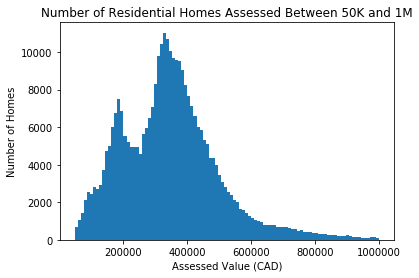

In [91]:
# Generate a plot of residential homes and minimize outliers.
ax = df_res['value'].plot(kind='hist', bins=100, range=(50000,1000000), title='Number of Residential Homes Assessed Between 50K and 1M')
ax.set_xlabel('Assessed Value (CAD)')
ax.set_ylabel('Number of Homes')

#save plot to local memory
plt.savefig('residential_homes_50K-1M.png')
plt.show()

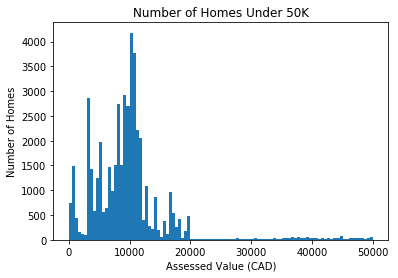

In [92]:
ax = df_res['value'].plot(kind='hist', bins=100, range=(0,50000), title='Number of Homes Under 50K')
ax.set_ylabel('Number of Homes')
ax.set_xlabel('Assessed Value (CAD)')

plt.savefig('residential_homes_<50K.png')
plt.show()

In [93]:
df_res_avg = df_res[df_res['value'].between(50000,1000000)]
print(df_res_avg.head())

    acc_num               nb        class   value suite number  \
0   1315092           OLIVER  Residential  259000  1005  10011   
1   9201484       KENILWORTH  Residential  312500   NaN   8503   
2   4225520      TWIN BROOKS  Residential  441000   NaN    811   
3  10038386  MAGRATH HEIGHTS  Residential  488000   NaN   1235   
5   1132265           FRASER  Residential  194000   NaN  14755   

              street  garage zoning lot_size year_built  
0      123 STREET NW   False    DC1      NaN       1981  
1       52 STREET NW    True    RF1      557       1964  
2     113B STREET NW    True    RF1      427       1995  
3  MCKINNEY COURT NW    True    RSL      407       2006  
5       25 STREET NW   False    RF5      NaN       1981  


340000.0


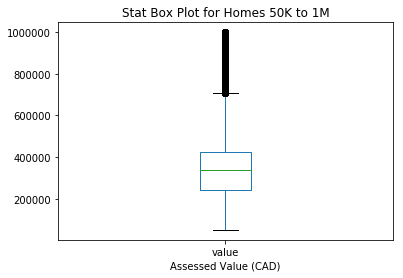

In [94]:
print(df_res_avg['value'].median())
ax = df_res_avg['value'].plot(kind='box', title='Stat Box Plot for Homes 50K to 1M')
ax.set_xlabel('Assessed Value (CAD)')

plt.savefig('residental_box_50K_1M.png')
plt.show()

In [95]:
df_res_avg['value'].describe()

count     320228.000000
mean      348016.716215
std       151722.829765
min        50000.000000
25%       240000.000000
50%       340000.000000
75%       426500.000000
max      1000000.000000
Name: value, dtype: float64

In [96]:
df.columns

Index(['acc_num', 'nb', 'class', 'value', 'suite', 'number', 'street',
       'garage', 'zoning', 'lot_size', 'year_built'],
      dtype='object')

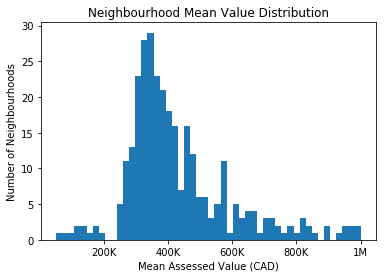

In [97]:
ax = df_grouped['value'].plot(kind='hist', range=(50000,1000000), bins=50, title='Neighbourhood Mean Value Distribution')
ax.set_ylabel('Number of Neighbourhoods')
ax.set_xlabel('Mean Assessed Value (CAD)')
ax.set_xticklabels(['50K', '200K', '400K', '600K', '800K', '1M'])

plt.savefig('neighbourhood_grouped_means_50K-1M.png')
plt.show()

# EPS Neighbourhood Criminal Incidents

In [98]:
col_list = ['nb', 'violation', 'year', 'quarter', 'month', 'num_incidents']
col_dtypes = {'nb':'category', 'violation':'category', 'year':str, 'month':str}
col_order = ['nb', 'violation', 'num_incidents', 'year', 'month', 'quarter']

df_crim = pd.read_csv('EPS_Neighbourhood_Criminal_Incidents.csv', header=0, names=col_list, dtype=col_dtypes)[col_order]
print(df_crim.head(2))
print(df_crim.tail(2))

             nb violation  num_incidents  year month quarter
0  ABBOTTSFIELD   Assault              3  2009     1      Q1
1  ABBOTTSFIELD   Assault              5  2009     2      Q1
                          nb           violation  num_incidents  year month  \
99703  YOUNGSTOWN INDUSTRIAL  Theft From Vehicle              1  2018     6   
99704  YOUNGSTOWN INDUSTRIAL    Theft Of Vehicle              1  2018     4   

      quarter  
99703      Q2  
99704      Q2  


# This dataset will require
- a dictionary of Neighbourhood Descriptions to Neighbourhood IDs
- add Neighbourhood IDs based on Neighbourhood Descriptions
- converting incident year and month to a datetime index
- a pandas groupby Neighbourhood ID and sum of the number of incidents 
- linking `df_crim` to `df` on the Neighbourhood ID axis

In [99]:
df_crim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99705 entries, 0 to 99704
Data columns (total 6 columns):
nb               99705 non-null category
violation        99705 non-null category
num_incidents    99705 non-null int64
year             99705 non-null object
month            99705 non-null object
quarter          99705 non-null object
dtypes: category(2), int64(1), object(3)
memory usage: 3.3+ MB


In [100]:
# Add a zero padding to the front of the month column
# df_crim['month'] = df_crim['month'].apply(lambda x:'{:0>2}'.format(x))

In [101]:
datetime = pd.to_datetime(df_crim['year'] + '-' + df_crim['month'])
# df_crim_date = df_crim.set_index(datetime)
df_crim['record_month'] = datetime

In [102]:
df_crim_clean = df_crim[['nb', 'violation', 'num_incidents', 'record_month']]
df_crim_clean.head()

,nb,violation,num_incidents,record_month
0,ABBOTTSFIELD,Assault,3,2009-01-01
1,ABBOTTSFIELD,Assault,5,2009-02-01
2,ABBOTTSFIELD,Assault,2,2009-03-01
3,ABBOTTSFIELD,Assault,2,2009-04-01
4,ABBOTTSFIELD,Assault,6,2009-05-01


In [103]:
neighbour_dict = {1010:'ALBERTA AVENUE', 1020:'BOYLE STREET', 1030:'CENTRAL MCDOUGALL', 1070:'CROMDALE', 1080:'DELTON', 1090:'DOWNTOWN', 1100:'EASTWOOD', 1111:'BLATCHFORD AREA', 1120:'EDMONTON NORTHLANDS', 1130:'ELMWOOD PARK', 1140:'MCCAULEY', 1150:'OLIVER', 1160:'PARKDALE', 1170:'PRINCE RUPERT', 1180:'QUEEN MARY PARK', 1190:'RIVER VALLEY KINNAIRD', 1200:'RIVER VALLEY VICTORIA', 1210:'RIVERDALE', 1220:'ROSSDALE', 1230:'SPRUCE AVENUE', 1240:'VIRGINIA PARK', 1250:'WESTWOOD', 1270:'YELLOWHEAD CORRIDOR EAST', 1280:'YELLOWHEAD CORRIDOR WEST', 2010:'ABBOTTSFIELD', 2020:'BALWIN', 2030:'BANNERMAN', 2040:'BEACON HEIGHTS', 2050:'BELLE RIVE', 2060:'BELLEVUE', 2070:'BELMONT', 2080:'BELVEDERE', 2090:'BERGMAN', 2100:'BEVERLY HEIGHTS', 2110:'BRINTNELL', 2120:'CANON RIDGE', 2130:'CASSELMAN', 2145:'CLAREVIEW TOWN CENTRE', 2160:'CLOVER BAR AREA', 2230:'DELWOOD', 2241:'EAUX CLAIRES', 2251:'EBBERS', 2260:'EVANSDALE', 2270:'EVERGREEN', 2280:'FRASER', 2290:'GLENGARRY', 2311:'GORMAN', 2320:'HAIRSINE', 2330:'HIGHLANDS', 2340:'HOLLICK-KENYON', 2350:'HOMESTEADER', 2360:'INDUSTRIAL HEIGHTS', 2380:'KENNEDALE INDUSTRIAL', 2390:'KERNOHAN', 2400:'KILDARE', 2410:'KILKENNY', 2420:'KILLARNEY', 2430:'KIRKNESS', 2440:'KLARVATTEN', 2450:'LAGO LINDO', 2462:'CRYSTALLINA NERA EAST', 2463:'CRYSTALLINA NERA WEST', 2500:'MATT BERRY', 2511:'MAYLIEWAN', 2521:'MCCONACHIE AREA', 2530:'MCLEOD', 2541:'MILLER', 2550:'MONTROSE', 2560:'NEWTON', 2580:'NORTHMOUNT', 2590:'OVERLANDERS', 2600:'OZERNA', 2611:'CY BECKER', 2630:'RIVER VALLEY HERMITAGE', 2640:'RIVER VALLEY HIGHLANDS', 2650:'RIVER VALLEY RUNDLE', 2660:'RUNDLE HEIGHTS', 2670:'RURAL NORTH EAST HORSE HILL', 2671:'MARQUIS', 2681:'EDMONTON ENERGY AND TECHNOLOGY PARK', 2690:'RURAL NORTH EAST SOUTH STURGEON', 2700:'SCHONSEE', 2710:'SIFTON PARK', 2720:'YORK', 3010:'ATHLONE', 3020:'BARANOW', 3030:'BATURYN', 3040:'BEAUMARIS', 3050:'BROWN INDUSTRIAL', 3060:'CAERNARVON', 3070:'CALDER', 3080:'CANOSSA', 3090:'CARLISLE', 3111:'GRIESBACH', 3120:'CHAMBERY', 3140:'CRESTWOOD', 3150:'CUMBERLAND', 3160:'DOMINION INDUSTRIAL', 3170:'DOVERCOURT', 3180:'DUNLUCE', 3190:'ELSINORE', 3200:'GLENORA', 3210:'GROVENOR', 3220:'HAGMANN ESTATE INDUSTRIAL', 3230:'HUFF BREMNER ESTATE INDUSTRIAL', 3240:'INGLEWOOD', 3250:'KENSINGTON', 3260:'LAUDERDALE', 3270:'LAURIER HEIGHTS', 3280:'LORELEI', 3290:'MCARTHUR INDUSTRIAL', 3300:'MCQUEEN', 3310:'NORTH GLENORA', 3320:'OXFORD', 3330:'PARKVIEW', 3340:'PEMBINA', 3350:'PRINCE CHARLES', 3360:'RAMPART INDUSTRIAL', 3370:'RAPPERSWILL', 3380:'RIVER VALLEY CAPITOL HILL', 3381:'RIVER VALLEY GLENORA', 3382:'RIVER VALLEY LAURIER', 3390:'ROSSLYN', 3410:'SHERBROOKE', 3430:'WELLINGTON', 3440:'WESTMOUNT', 3450:'WOODCROFT', 3460:'ALBANY', 3470:'CARLTON', 3480:'HUDSON', 3490:'GOODRIDGE CORNERS', 4010:'ALBERTA PARK INDUSTRIAL', 4011:'ANTHONY HENDAY', 4012:'ANTHONY HENDAY SOUTH WEST', 4013:'ANTHONY HENDAY TERWILLEGAR', 4014:'ANTHONY HENDAY SOUTH', 4015:'ANTHONY HENDAY MISTATIM', 4016:'ANTHONY HENDAY CASTLEDOWNS', 4017:'ANTHONY HENDAY LAKE DISTRICT', 4018:'ANTHONY HENDAY BIG LAKE', 4019:'ANTHONY HENDAY ENERGY PARK', 4020:'ALDERGROVE', 4021:'ANTHONY HENDAY HORSE HILL', 4022:'ANTHONY HENDAY CLAREVIEW', 4023:'ANTHONY HENDAY RAMPART', 4024:'ANTHONY HENDAY SOUTH BLACKBURNE', 4030:'ARMSTRONG INDUSTRIAL', 4040:'BELMEAD', 4050:'BONAVENTURE INDUSTRIAL', 4060:'BRITANNIA YOUNGSTOWN', 4070:'CALLINGWOOD NORTH', 4080:'CALLINGWOOD SOUTH', 4090:'CANORA', 4100:'CARLETON SQUARE INDUSTRIAL', 4110:'DECHENE', 4120:'DONSDALE', 4130:'EDMISTON INDUSTRIAL', 4140:'ELMWOOD', 4150:'GAGNON ESTATE INDUSTRIAL', 4160:'GARIEPY', 4170:'GARSIDE INDUSTRIAL', 4180:'GLENWOOD', 4190:'HAWIN PARK ESTATE INDUSTRIAL', 4200:'HIGH PARK', 4210:'HIGH PARK INDUSTRIAL', 4220:'JAMIESON PLACE', 4230:'JASPER PARK', 4240:'LA PERLE', 4270:'LYMBURN', 4280:'LYNNWOOD', 4290:'MAYFIELD', 4300:'MCNAMARA INDUSTRIAL', 4310:'MEADOWLARK PARK', 4320:'MISTATIM INDUSTRIAL', 4330:'MITCHELL INDUSTRIAL', 4340:'MORIN INDUSTRIAL', 4350:'NORWESTER INDUSTRIAL', 4360:'OLESKIW', 4380:'ORMSBY PLACE', 4390:'PATRICIA HEIGHTS', 4400:'PLACE LARUE', 4410:'POUNDMAKER INDUSTRIAL', 4420:'QUESNELL HEIGHTS', 4430:'RIO TERRACE', 4440:'RIVER VALLEY LESSARD NORTH', 4451:'RIVER VALLEY OLESKIW', 4461:'THE HAMPTONS', 4462:'EDGEMONT', 4463:'RIVERVIEW AREA', 4464:'THE UPLANDS', 4466:'CAMERON HEIGHTS', 4467:'RIVER VALLEY CAMERON', 4468:'STILLWATER', 4469:'RIVER\'S EDGE', 4470:'RURAL WEST BIG LAKE', 4471:'TRUMPETER AREA', 4473:'HAWKS RIDGE', 4474:'STARLING', 4475:'KINOKAMAU PLAINS AREA', 4477:'KINGLET GARDENS', 4485:'LEWIS FARMS INDUSTRIAL', 4486:'STEWART GREENS', 4487:'SECORD', 4490:'SHEFFIELD INDUSTRIAL', 4500:'SHERWOOD', 4510:'STONE INDUSTRIAL', 4520:'SUMMERLEA', 4530:'SUNWAPTA INDUSTRIAL', 4540:'TERRA LOSA', 4551:'GRANVILLE', 4560:'THORNCLIFF', 4570:'WEDGEWOOD HEIGHTS', 4580:'WEST JASPER PLACE', 4590:'WEST MEADOWLARK PARK', 4600:'WEST SHEFFIELD INDUSTRIAL', 4610:'WESTRIDGE', 4620:'WESTVIEW VILLAGE', 4630:'WHITE INDUSTRIAL', 4640:'WILSON INDUSTRIAL', 4650:'WINTERBURN INDUSTRIAL AREA EAST', 4660:'YOUNGSTOWN INDUSTRIAL', 4670:'WINTERBURN INDUSTRIAL AREA WEST', 4700:'BRECKENRIDGE GREENS', 4710:'POTTER GREENS', 4720:'GLASTONBURY', 4730:'SUDER GREENS', 4740:'WEBBER GREENS', 4750:'ROSENTHAL', 5010:'ALLENDALE', 5020:'ASPEN GARDENS', 5030:'BEARSPAW', 5040:'BELGRAVIA', 5050:'BLACKMUD CREEK RAVINE', 5060:'BLUE QUILL', 5070:'BLUE QUILL ESTATES', 5080:'BRANDER GARDENS', 5090:'BROOKSIDE', 5100:'BULYEA HEIGHTS', 5110:'CALGARY TRAIL NORTH', 5120:'CALGARY TRAIL SOUTH', 5130:'CARTER CREST', 5151:'STRATHCONA JUNCTION', 5160:'DUGGAN', 5170:'EMPIRE PARK', 5180:'ERMINESKIN', 5190:'FALCONER HEIGHTS', 5200:'GARNEAU', 5210:'GRANDVIEW HEIGHTS', 5220:'GREENFIELD', 5230:'HENDERSON ESTATES', 5250:'KEHEEWIN', 5260:'LANSDOWNE', 5270:'LENDRUM PLACE', 5280:'MALMO PLAINS', 5290:'MCKERNAN', 5300:'OGILVIE RIDGE', 5310:'PARKALLEN', 5320:'PLEASANTVIEW', 5330:'QUEEN ALEXANDRA', 5340:'RAMSAY HEIGHTS', 5350:'RHATIGAN RIDGE', 5360:'RIDEAU PARK', 5370:'RIVER VALLEY MAYFAIR', 5380:'RIVER VALLEY TERWILLEGAR', 5390:'RIVER VALLEY WALTERDALE', 5400:'RIVER VALLEY WHITEMUD', 5401:'RIVER VALLEY FORT EDMONTON', 5405:'RIVER VALLEY WINDERMERE', 5430:'ROYAL GARDENS', 5451:'RICHFORD', 5452:'MACEWAN', 5453:'BLACKMUD CREEK', 5454:'RUTHERFORD', 5456:'HERITAGE VALLEY AREA', 5457:'CALLAGHAN', 5458:'ALLARD', 5460:'SKYRATTLER', 5462:'CHAPPELLE AREA', 5463:'DESROCHERS AREA', 5464:'HERITAGE VALLEY TOWN CENTRE AREA', 5465:'HAYS RIDGE AREA', 5466:'CASHMAN', 5467:'CAVANAGH', 5468:'GRAYDON HILL', 5469:'PAISLEY', 5470:'STEINHAUER', 5476:'MAGRATH HEIGHTS', 5477:'MACTAGGART', 5480:'STRATHCONA', 5490:'SWEET GRASS', 5505:'AMBLESIDE', 5511:'TWIN BROOKS', 5520:'UNIVERSITY OF ALBERTA', 5530:'UNIVERSITY OF ALBERTA FARM', 5540:'WESTBROOK ESTATES', 5550:'WHITEMUD CREEK RAVINE NORTH', 5560:'WHITEMUD CREEK RAVINE SOUTH', 5565:'WHITEMUD CREEK RAVINE TWIN BROOKS', 5570:'WINDERMERE', 5575:'WINDERMERE AREA', 5576:'KESWICK AREA', 5578:'GLENRIDDING HEIGHTS', 5579:'GLENRIDDING RAVINE', 5580:'WINDSOR PARK', 5590:'BLACKBURNE', 5610:'HADDOW', 5620:'HODGSON', 5630:'LEGER', 5640:'TERWILLEGAR TOWNE', 5642:'SOUTH TERWILLEGAR', 6010:'ARGYLL', 6020:'AVONMORE', 6030:'BISSET', 6040:'BONNIE DOON', 6061:'CAPILANO', 6070:'CLOVERDALE', 6090:'CORONET ADDITION INDUSTRIAL', 6100:'CORONET INDUSTRIAL', 6110:'CPR IRVINE', 6140:'CRAWFORD PLAINS', 6150:'DALY GROVE', 6160:'DAVIES INDUSTRIAL EAST', 6170:'DAVIES INDUSTRIAL WEST', 6180:'EASTGATE BUSINESS PARK', 6190:'EDMONTON RESEARCH AND DEVELOPMENT PARK', 6195:'SOUTH EDMONTON COMMON', 6200:'EKOTA', 6211:'ELLERSLIE', 6213:'SUMMERSIDE', 6214:'ELLERSLIE INDUSTRIAL', 6216:'THE ORCHARDS AT ELLERSLIE', 6230:'FOREST HEIGHTS', 6240:'FULTON PLACE', 6250:'GAINER INDUSTRIAL', 6260:'GIRARD INDUSTRIAL', 6270:'GOLD BAR', 6280:'GREENVIEW', 6290:'HAZELDEAN', 6300:'HILLVIEW', 6310:'HOLYROOD', 6320:'IDYLWYLDE', 6330:'JACKSON HEIGHTS', 6340:'KAMEYOSEK', 6350:'KENILWORTH', 6360:'KING EDWARD PARK', 6370:'KINISKI GARDENS', 6380:'LAMBTON INDUSTRIAL', 6390:'LARKSPUR', 6400:'LEE RIDGE', 6410:'MAPLE RIDGE', 6420:'MAPLE RIDGE INDUSTRIAL', 6430:'MCINTYRE INDUSTRIAL', 6441:'MAPLE', 6442:'SILVER BERRY', 6443:'TAMARACK', 6444:'LAUREL', 6445:'ASTER', 6450:'MENISA', 6460:'MEYOKUMIN', 6470:'MEYONOHK', 6480:'MICHAELS PARK', 6491:'MILL CREEK RAVINE NORTH', 6492:'MILL CREEK RAVINE SOUTH', 6510:'MILL WOODS PARK', 6520:'MILL WOODS TOWN CENTRE', 6530:'MINCHAU', 6540:'MORRIS INDUSTRIAL', 6550:'OTTEWELL', 6560:'PAPASCHASE INDUSTRIAL', 6570:'PARSONS INDUSTRIAL', 6580:'POLLARD MEADOWS', 6590:'PYLYPOW INDUSTRIAL', 6600:'RICHFIELD', 6610:'RITCHIE', 6620:'RIVER VALLEY GOLD BAR', 6630:'RIVER VALLEY RIVERSIDE', 6640:'ROPER INDUSTRIAL', 6650:'ROSEDALE INDUSTRIAL', 6660:'RURAL SOUTH EAST', 6661:'CHARLESWORTH', 6662:'WALKER', 6663:'DECOTEAU', 6665:'ANTHONY HENDAY SOUTH EAST', 6670:'SAKAW', 6680:'SATOO', 6690:'SOUTHEAST INDUSTRIAL', 6700:'STRATHCONA INDUSTRIAL PARK', 6710:'STRATHEARN', 6720:'TAWA', 6730:'TERRACE HEIGHTS', 6750:'TIPASKAN', 6760:'TWEDDLE PLACE', 6770:'WEINLOS', 6780:'WEIR INDUSTRIAL', 6790:'WILD ROSE'}

In [104]:
print(neighbour_dict[4469])

RIVER'S EDGE


In [107]:
df_dict = df[['nb', 'nb_id']].drop_duplicates()
df_dict.index = df_dict.nb_id
df_dict.to_dict(orient='dict')['nb']

{0: 'OLIVER',
 1: 'KENILWORTH',
 2: 'TWIN BROOKS',
 3: 'MAGRATH HEIGHTS',
 5: 'FRASER',
 6: 'SCHONSEE',
 7: 'WILD ROSE',
 8: 'CRESTWOOD',
 9: 'HADDOW',
 10: 'PLEASANTVIEW',
 11: 'MCCONACHIE AREA',
 12: 'PATRICIA HEIGHTS',
 13: 'WEINLOS',
 14: 'LEGER',
 15: 'GLENORA',
 16: 'ELLERSLIE',
 17: 'MILL WOODS TOWN CENTRE',
 18: 'HIGHLANDS',
 19: 'CASHMAN',
 20: 'WEBBER GREENS',
 21: 'BATURYN',
 22: 'BANNERMAN',
 23: 'CHARLESWORTH',
 24: 'LARKSPUR',
 25: 'GARIEPY',
 26: 'DONSDALE',
 27: 'CLOVERDALE',
 28: 'WEST JASPER PLACE',
 29: 'WALKER',
 30: 'BELGRAVIA',
 31: 'GARNEAU',
 32: 'RUTHERFORD',
 33: 'SILVER BERRY',
 34: 'NORTH GLENORA',
 35: 'CALLINGWOOD SOUTH',
 37: 'KINISKI GARDENS',
 38: 'BULYEA HEIGHTS',
 40: 'CENTRAL MCDOUGALL',
 42: 'LENDRUM PLACE',
 43: 'WESTMOUNT',
 44: 'BEAUMARIS',
 45: 'CARLISLE',
 46: 'KLARVATTEN',
 47: 'CHAPPELLE AREA',
 49: 'TERRA LOSA',
 50: 'LA PERLE',
 51: 'DOWNTOWN',
 53: 'MAPLE RIDGE',
 54: 'WINDERMERE',
 55: 'KEHEEWIN',
 56: 'ROSENTHAL',
 57: 'POLLARD MEADOWS',

In [108]:
df_dict.nb.to_dict()

{0: 'OLIVER',
 1: 'KENILWORTH',
 2: 'TWIN BROOKS',
 3: 'MAGRATH HEIGHTS',
 5: 'FRASER',
 6: 'SCHONSEE',
 7: 'WILD ROSE',
 8: 'CRESTWOOD',
 9: 'HADDOW',
 10: 'PLEASANTVIEW',
 11: 'MCCONACHIE AREA',
 12: 'PATRICIA HEIGHTS',
 13: 'WEINLOS',
 14: 'LEGER',
 15: 'GLENORA',
 16: 'ELLERSLIE',
 17: 'MILL WOODS TOWN CENTRE',
 18: 'HIGHLANDS',
 19: 'CASHMAN',
 20: 'WEBBER GREENS',
 21: 'BATURYN',
 22: 'BANNERMAN',
 23: 'CHARLESWORTH',
 24: 'LARKSPUR',
 25: 'GARIEPY',
 26: 'DONSDALE',
 27: 'CLOVERDALE',
 28: 'WEST JASPER PLACE',
 29: 'WALKER',
 30: 'BELGRAVIA',
 31: 'GARNEAU',
 32: 'RUTHERFORD',
 33: 'SILVER BERRY',
 34: 'NORTH GLENORA',
 35: 'CALLINGWOOD SOUTH',
 37: 'KINISKI GARDENS',
 38: 'BULYEA HEIGHTS',
 40: 'CENTRAL MCDOUGALL',
 42: 'LENDRUM PLACE',
 43: 'WESTMOUNT',
 44: 'BEAUMARIS',
 45: 'CARLISLE',
 46: 'KLARVATTEN',
 47: 'CHAPPELLE AREA',
 49: 'TERRA LOSA',
 50: 'LA PERLE',
 51: 'DOWNTOWN',
 53: 'MAPLE RIDGE',
 54: 'WINDERMERE',
 55: 'KEHEEWIN',
 56: 'ROSENTHAL',
 57: 'POLLARD MEADOWS',

In [109]:
nb_incidents = df_crim.pivot_table(index='nb', values='num_incidents', 
                                   columns='violation', aggfunc='sum', fill_value=0)

neighbourhood_assess = df_grouped.merge(nb_incidents, left_on='nb', right_index=True)

nb_assess = neighbourhood_assess.reset_index()
nb_assess

,nb,value,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000
0,ABBOTTSFIELD,3.127927e+05,349,92,1,88,53,192,145,1
1,ALBANY,3.096050e+05,27,52,0,9,3,74,26,6
2,ALBERTA AVENUE,2.824186e+05,1188,969,13,300,112,1139,770,18
3,ALBERTA PARK INDUSTRIAL,3.041986e+06,3,81,0,0,4,81,58,11
4,ALDERGROVE,3.529064e+05,169,168,0,56,23,278,170,4
5,ALLARD,3.477414e+05,18,72,0,1,0,66,27,16
6,ALLENDALE,5.020745e+05,151,227,0,34,19,396,181,10
7,AMBLESIDE,3.488134e+05,47,159,0,10,5,183,67,24
8,ANTHONY HENDAY,3.003750e+05,11,11,0,1,1,9,9,5
9,ANTHONY HENDAY BIG LAKE,2.701146e+05,3,5,0,0,1,1,6,4


In [112]:
def incident_dist(incident, high_count):
    '''A function that takes an criminal incident designator,
    (Assault, Break and Enter, Homicide, Robbery, Sexual Assults, Theft From Vehicle,
    Theft Of Vehicle, Theft Over $5000) and returns a histogram distribution.
    low_count - is an int that represents the lowest incident count for a neighbourhood
    high_count - is an int that represents the lowest incident count for a neighbourhood
    '''
    
    print('The maximum number of ' + incident + ' for any neighbourhood in Edmonton is: \n' 
          + str(nb_assess[incident].max()))
    print('\nThe neighbourhoods with no ' + incident + ' is/are: \n' 
          + str(nb_assess[nb_assess[incident] == 0].nb))
    print('\nThe neighbourhood with the most ' + incident + ' is: \n' 
          + str(nb_assess[nb_assess[incident] == nb_assess[incident].max()].nb))
    
    ax = nb_assess[incident].plot(kind='hist',range=(0,high_count), bins=100, title=incident)
    ax.set_ylabel('Number of Neighbourhoods')
    ax.set_xlabel('Number of Incidents from 2009-18')
plt.show()

The maximum number of Theft Of Vehicle for any neighbourhood in Edmonton is: 
959

The neighbourhoods with no Theft Of Vehicle is/are: 
11         ANTHONY HENDAY CLAREVIEW
14     ANTHONY HENDAY LAKE DISTRICT
24                            ASTER
45            BLACKMUD CREEK RAVINE
229         MILL CREEK RAVINE SOUTH
279       RIVER VALLEY CAPITOL HILL
366     WHITEMUD CREEK RAVINE SOUTH
370                 WINDERMERE AREA
Name: nb, dtype: category
Categories (395, object): [ABBOTTSFIELD, ALBANY, ALBERTA AVENUE, ALBERTA PARK INDUSTRIAL, ..., MILL WOODS PARK, RIVER VALLEY LAURIER, RIVER VALLEY LESSARD NORTH, GLENRIDDING RAVINE]

The neighbourhood with the most Theft Of Vehicle is: 
104    DOWNTOWN
Name: nb, dtype: category
Categories (395, object): [ABBOTTSFIELD, ALBANY, ALBERTA AVENUE, ALBERTA PARK INDUSTRIAL, ..., MILL WOODS PARK, RIVER VALLEY LAURIER, RIVER VALLEY LESSARD NORTH, GLENRIDDING RAVINE]


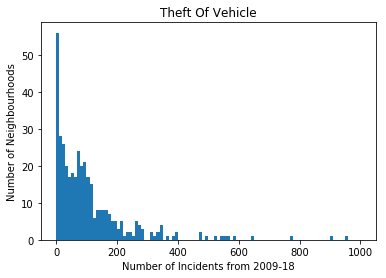

In [113]:
incident_dist('Theft Of Vehicle',1000)

In [15]:
import pandas as pd
from sodapy import Socrata

In [41]:
MyAppToken = '0fUlKxNKJxa4PoK9svBIzblGl'
client = Socrata("data.edmonton.ca", 
                 MyAppToken,
                 username = "cody@schellenberger.me", 
                 password = "XXXXXXXXX")

In [42]:
property2018 = client.get("3pdp-qp95")
property12_17 = client.get("aph8-rdbr")
property2018_detail = client.get("tu7d-8rsy")

In [43]:
property2018_df = pd.DataFrame.from_records(property2018)
property12_17_df = pd.DataFrame.from_records(property12_17)
property2018_detail_df = pd.DataFrame.from_records(property2018_detail)

In [44]:
property2018_df.head()

,account_number,garage,house_number,latitude,longitude,neighbourhood,neighbourhood_id,street_name,suite,tax_class,total_asmt,ward
0,1315092,N,10011,53.540948737537185,-113.53361896511977,OLIVER,1150,123 STREET NW,1005,Residential,259000,Ward 6
1,9201484,Y,8503,53.5199516027208,-113.419428825785,KENILWORTH,6350,52 STREET NW,NaN,Residential,312500,Ward 8
2,4225520,Y,811,53.43789171913,-113.525606590769,TWIN BROOKS,5511,113B STREET NW,NaN,Residential,441000,Ward 9
3,10038386,Y,1235,53.4499528002567,-113.565004980319,MAGRATH HEIGHTS,5476,MCKINNEY COURT NW,NaN,Residential,488000,Ward 9
4,3908589,N,11520,53.539174943987184,-113.52077484050992,OLIVER,1150,100 AVENUE NW,103,Non Residential,69000,Ward 6


In [45]:
property12_17_df.head()

,acc_id,assessed_value,assessment_class,assessment_year,build_year,garage,house_num,legal_description,lot_size_substr,neighbourhood_name,street_name,suite_name,zoning
0,1280049,316500,Residential,2015,1954,Y,9501,Plan: 6530ET Block: 14 Lot: 5,686.375,WEST JASPER PLACE,155 STREET NW,NaN,RF1
1,1137926,403500,Residential,2017,1962,Y,15208,Plan: 5580KS Block: 3 Lot: 10,675.924,LYNNWOOD,79A AVENUE NW,NaN,RF1
2,1367432,248000,Residential,2016,1958,Y,16510,Plan: 4746KS Block: 1 Lot: 7,510.853,BRITANNIA YOUNGSTOWN,106 AVENUE NW,NaN,RF1
3,9301532,193000,Residential,2014,1978,N,954,Plan: 8020357 Unit: 33,251.688,TIPASKAN,LAKEWOOD ROAD NORTH NW,NaN,RF5
4,9459306,277500,Residential,2013,1979,N,1310,Plan: 7722530 Block: 23 Lot: 56,515.231,SAKAW,56 STREET NW,NaN,RF1


In [47]:
property2018_detail_df.head()

,account_number,house_num,latitude,legal_description,longitude,lot_size,neighbourhood,neighbourhood_id,street_name,suite,ward,year_built,zoning
0,2209906,14849,53.5783559573219,Plan: 7069KS Block: 5 Lot: 14,-113.576950000616,13556,DOMINION INDUSTRIAL,3160,124 AVENUE NW,NaN,Ward 2,1967,IB
1,2009827,14207,53.5110458086784,Plan: 5978KS Block: 18 Lot: 40 / Plan: 5978K...,-113.566557456628,14,LAURIER HEIGHTS,3270,75 AVENUE NW,NaN,Ward 1,NaN,RF1
2,10736415,5165,53.4054212286233,Plan: 1523262 Block: 1 Lot: 400MR,-113.475962570113,1845,ELLERSLIE INDUSTRIAL,6214,CRABAPPLE LINK SW,NaN,Ward 10,NaN,AP
3,10411546,3,53.4305838744424,Plan: 1324078 Block: 2 Lot: 40,-113.630599646944,1548,WINDERMERE,5570,WINDERMERE DRIVE SW,NaN,Ward 9,2017,DC1
4,10846852,3605,53.4000206456135,Plan: 1721233 Block: 1 Lot: 1,-113.565165994833,123,DESROCHERS AREA,5463,141 STREET SW,NaN,Ward 9,NaN,RMD


In [1]:
import pandas as pd
from sodapy import Socrata
from datetime import datetime

client = Socrata("data.edmonton.ca", None)

results_list = []
offset = 0
limit = 2000

start = datetime.now()
while True:
    print("Offset: {}".format(offset))
    results = client.get("aph8-rdbr", limit=limit, offset=offset)
    if len(results) == 0:
        print("No records found")
        break
    else:
        results_list+= results
        offset += limit

end = datetime.now()

print("Total time in minutes {}".format((end - start).total_seconds() // 60))

Offset: 0
Offset: 2000
Offset: 4000
Offset: 6000
Offset: 8000
Offset: 10000
Offset: 12000
Offset: 14000
Offset: 16000
Offset: 18000
Offset: 20000
Offset: 22000
Offset: 24000
Offset: 26000
Offset: 28000
Offset: 30000
Offset: 32000
Offset: 34000
Offset: 36000
Offset: 38000
Offset: 40000
Offset: 42000
Offset: 44000
Offset: 46000
Offset: 48000
Offset: 50000
Offset: 52000
Offset: 54000
Offset: 56000
Offset: 58000
Offset: 60000
Offset: 62000
Offset: 64000
Offset: 66000
Offset: 68000
Offset: 70000
Offset: 72000
Offset: 74000
Offset: 76000
Offset: 78000
Offset: 80000
Offset: 82000
Offset: 84000
Offset: 86000
Offset: 88000
Offset: 90000
Offset: 92000
Offset: 94000
Offset: 96000
Offset: 98000
Offset: 100000
Offset: 102000
Offset: 104000
Offset: 106000
Offset: 108000
Offset: 110000
Offset: 112000
Offset: 114000
Offset: 116000
Offset: 118000
Offset: 120000
Offset: 122000
Offset: 124000
Offset: 126000
Offset: 128000
Offset: 130000
Offset: 132000
Offset: 134000
Offset: 136000
Offset: 138000
Offset: 

Offset: 1094000
Offset: 1096000
Offset: 1098000
Offset: 1100000
Offset: 1102000
Offset: 1104000
Offset: 1106000
Offset: 1108000
Offset: 1110000
Offset: 1112000
Offset: 1114000
Offset: 1116000
Offset: 1118000
Offset: 1120000
Offset: 1122000
Offset: 1124000
Offset: 1126000
Offset: 1128000
Offset: 1130000
Offset: 1132000
Offset: 1134000
Offset: 1136000
Offset: 1138000
Offset: 1140000
Offset: 1142000
Offset: 1144000
Offset: 1146000
Offset: 1148000
Offset: 1150000
Offset: 1152000
Offset: 1154000
Offset: 1156000
Offset: 1158000
Offset: 1160000
Offset: 1162000
Offset: 1164000
Offset: 1166000
Offset: 1168000
Offset: 1170000
Offset: 1172000
Offset: 1174000
Offset: 1176000
Offset: 1178000
Offset: 1180000
Offset: 1182000
Offset: 1184000
Offset: 1186000
Offset: 1188000
Offset: 1190000
Offset: 1192000
Offset: 1194000
Offset: 1196000
Offset: 1198000
Offset: 1200000
Offset: 1202000
Offset: 1204000
Offset: 1206000
Offset: 1208000
Offset: 1210000
Offset: 1212000
Offset: 1214000
Offset: 1216000
Offset: 

ReadTimeout: HTTPSConnectionPool(host='data.edmonton.ca', port=443): Read timed out. (read timeout=10)